# BC4 

Apex Pattern Deployers

- Marjorie Kinney *m20210647*
- Bruno Mendes *m20210627*
- Lucas Neves *m20211020*
- Farina Pontejos *m20210649*

Business Cases for Data Science

NOVA Information Management School

May 2022

https://github.com/fpontejos/bc3


## Initial Setup

### Imports

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import ceil
from datetime import timedelta, datetime
import os
import re
import warnings
import itertools
import collections

warnings.filterwarnings('ignore')



In [2]:
from matplotlib.colors import LinearSegmentedColormap


In [3]:
from functools import reduce

### Variables

In [10]:
COLORS = ['#2ec4b6', '#1e9fb4', '#0f7ab2', '#285892', '#49306b', '#7a3161', '#a13258', '#c63351', '#ea3449']

CAT_COLORS = ['#2EC4B6', '#0E79B2', '#49306B', '#9A325A', '#EA3449']
CONTRAST_COLORS = [COLORS[i] for i in range(len(COLORS)) if (i%2) == 0]

DIV_COLORS = ['#0e79b2', '#4b9ac3', '#84b8d4', '#bcd6e4', '#f4f4f4', '#c6c0d0', '#9b8eac', '#715e8b', '#49306b']

DIV_COL_HALF = ['#f4f4f4', '#bed3da', '#8ab2bf', '#5592a5', '#20718b']

UMP_COLORS = ['#22446D', '#FC9E4F', '#AB2346' ,'#6ABB5D']

DEFAULT_PALETTE = sns.color_palette(COLORS)
CONTRAST_PALETTE = sns.color_palette(CONTRAST_COLORS)
DIVERGENT_PALETTE = sns.color_palette(DIV_COLORS)
DIVHALF_PALETTE = sns.color_palette(DIV_COL_HALF)
CAT_PALETTE = sns.color_palette(CAT_COLORS)
UMP_PALETTE = sns.color_palette(UMP_COLORS)


DIV_CMAP = LinearSegmentedColormap.from_list("div_colors", DIV_COLORS)
DIV_H_CMAP = LinearSegmentedColormap.from_list("div_colors", DIV_COL_HALF)
CAT_CMAP = LinearSegmentedColormap.from_list("cat_colors", CAT_COLORS)
UMP_CMAP = LinearSegmentedColormap.from_list("ump_colors", UMP_COLORS)


SHOW_PLOTS = True
SAVE_PLOTS = True
RANDOM_STATE = 9

IMG_PATH = 'imgs/'
DATA_IN_PATH = '../../source/data/'
DATA_OUT_PATH = '../data_out/'


In [5]:
def save_fig(title, fig):
    if SAVE_PLOTS == True:
        fn = IMG_PATH + title.replace(' ','-') + '.png'
        fig.savefig(fn, bbox_inches='tight', transparent=True)
        


### Styles

In [6]:
sns.set(style="white")

sns.set_context("paper")
sns.set_palette(DEFAULT_PALETTE)


plt.rcParams['figure.dpi'] = 128

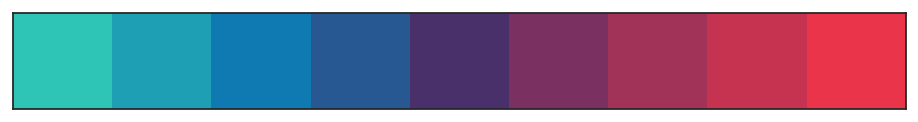

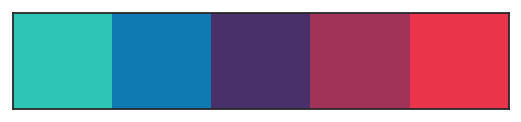

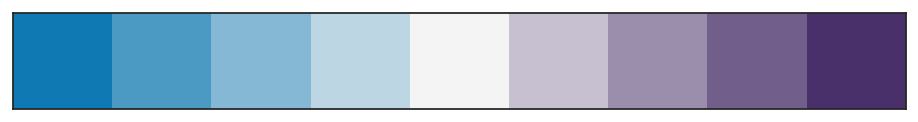

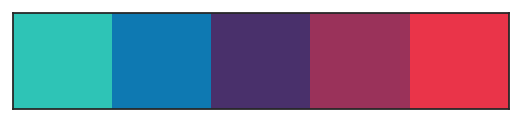

In [7]:
sns.palplot(DEFAULT_PALETTE)
sns.palplot(CONTRAST_PALETTE)
sns.palplot(DIVERGENT_PALETTE)
sns.palplot(CAT_PALETTE)
plt.show()

## Load Data

In [11]:
df_adjclose = pd.read_csv(DATA_IN_PATH + "adj_close.csv")
df_adjclose.head(3)

,Date,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,LUNA1-USD,MATIC-USD,SOL-USD
0,2017-04-26,NaN,NaN,NaN,NaN,1281.079956,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,1317.729980,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,1316.479980,NaN,NaN,NaN,NaN,NaN


In [12]:
df_close = pd.read_csv(DATA_IN_PATH + "close.csv")
df_close.head(3)

,Date,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,LUNA1-USD,MATIC-USD,SOL-USD
0,2017-04-26,NaN,NaN,NaN,NaN,1281.079956,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,1317.729980,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,1316.479980,NaN,NaN,NaN,NaN,NaN


In [13]:
df_high = pd.read_csv(DATA_IN_PATH + "high.csv")
df_high.head(3)

,Date,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,LUNA1-USD,MATIC-USD,SOL-USD
0,2017-04-26,NaN,NaN,NaN,NaN,1294.829956,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,1319.699951,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,1331.280029,NaN,NaN,NaN,NaN,NaN


In [14]:
df_low = pd.read_csv(DATA_IN_PATH + "low.csv")
df_low.head(3)

,Date,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,LUNA1-USD,MATIC-USD,SOL-USD
0,2017-04-26,NaN,NaN,NaN,NaN,1265.930054,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,1281.300049,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,1292.369995,NaN,NaN,NaN,NaN,NaN


In [15]:
df_open = pd.read_csv(DATA_IN_PATH + "open.csv")
df_open.head(3)

,Date,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,LUNA1-USD,MATIC-USD,SOL-USD
0,2017-04-26,NaN,NaN,NaN,NaN,1265.989990,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,1281.880005,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,1317.739990,NaN,NaN,NaN,NaN,NaN


In [16]:
df_vol = pd.read_csv(DATA_IN_PATH + "volume.csv")
df_vol.head(3)

,Date,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,LUNA1-USD,MATIC-USD,SOL-USD
0,2017-04-26,NaN,NaN,NaN,NaN,329631008,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,449196992,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,527488992,NaN,NaN,NaN,NaN,NaN


In [17]:
df_list = [df_adjclose,df_close,df_high,df_low]

In [18]:
df_ada = df_adjclose[['Date','ADA-USD']].rename(columns={'ADA-USD':'adj_close'})\
        .merge(df_close[['Date','ADA-USD']].rename(columns={'ADA-USD':'close'}), left_on='Date', right_on='Date')\
        .merge(df_high[['Date','ADA-USD']].rename(columns={'ADA-USD':'high'}), left_on='Date', right_on='Date')\
        .merge(df_low[['Date','ADA-USD']].rename(columns={'ADA-USD':'low'}), left_on='Date', right_on='Date')\
        .merge(df_open[['Date','ADA-USD']].rename(columns={'ADA-USD':'open'}), left_on='Date', right_on='Date')\
        .merge(df_vol[['Date','ADA-USD']].rename(columns={'ADA-USD':'volume'}), left_on='Date', right_on='Date')

#df_ada = pd.DataFrame(columns=df_cols)
df_ada

,Date,adj_close,close,high,low,open,volume
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08
1822,2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08
1823,2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08
1824,2022-04-24,0.886350,0.886350,0.897855,0.881857,0.888279,4.876295e+08


In [19]:
def assemble_coin_df(coin_i):
    df_data = df_adjclose[['Date',coin_i]].rename(columns={coin_i:'adj_close'})\
            .merge(df_close[['Date',coin_i]].rename(columns={coin_i:'close'}), left_on='Date', right_on='Date')\
            .merge(df_high[['Date',coin_i]].rename(columns={coin_i:'high'}), left_on='Date', right_on='Date')\
            .merge(df_low[['Date',coin_i]].rename(columns={coin_i:'low'}), left_on='Date', right_on='Date')\
            .merge(df_open[['Date',coin_i]].rename(columns={coin_i:'open'}), left_on='Date', right_on='Date')\
            .merge(df_vol[['Date',coin_i]].rename(columns={coin_i:'volume'}), left_on='Date', right_on='Date')
    return df_data


df_ada   = assemble_coin_df('ADA-USD')
df_atom  = assemble_coin_df('ATOM-USD')
df_avax  = assemble_coin_df('AVAX-USD')
df_axs   = assemble_coin_df('AXS-USD')
df_btc   = assemble_coin_df('BTC-USD')
df_eth   = assemble_coin_df('ETH-USD')
df_link  = assemble_coin_df('LINK-USD')
df_luna1 = assemble_coin_df('LUNA1-USD')
df_matic = assemble_coin_df('MATIC-USD')
df_sol   = assemble_coin_df('SOL-USD')

df_coins_list = [df_ada, df_atom, df_avax, df_axs, df_btc, df_eth, df_link, df_luna1, df_matic, df_sol]
df_coins_suff = ['ada', 'atom', 'avax', 'axs', 'btc', 'eth', 'link', 'luna1', 'matic', 'sol']

In [20]:
for i in range(len(df_coins_suff)):
    di = df_coins_list[i]
    df_coins_list[i] = df_coins_list[i].add_prefix(df_coins_suff[i]+'_')
    date_col = df_coins_suff[i]+'_Date'
    df_coins_list[i].rename(columns={date_col: 'Date'}, inplace=True)
    

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='left'), df_coins_list)


In [21]:
#df_merged

## Get external data

## Train Test Split

In [22]:
def rolling_window_split(df_, train_size, test_size, inc_size=1):
    """
    Creates rolling window split and returns two lists of the same size,
    where test[i] is the test set for train[i]
    Optionally provide increment size for window 
    """
    df_tosplit = df_.copy()
    test = []
    train = []
    data_len = len(df_tosplit)
    split_len = 0

    while split_len+test_size+train_size <= data_len :
        train.append(df_tosplit.iloc[split_len:split_len+train_size,:])
        test.append(df_tosplit.iloc[split_len+train_size:split_len+train_size+test_size,:])

        split_len += inc_size
    
    return train, test


In [23]:
ada_train, ada_test = rolling_window_split(df_ada, 14, 2)

In [24]:
#ada_train[200]

In [25]:
#ada_test[200]

### Scoring Function

In [26]:
def score_func(prediction, actual):
    return (prediction - actual)/actual

In [27]:
df_ada.columns.tolist()

['Date', 'adj_close', 'close', 'high', 'low', 'open', 'volume']

### How to use

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
#############################
## 
## This is an example only to show 
## how to use the rolling window split.
## 
## We shouldn't use any of the info 
## from the day being predicted !!!
## 
#############################


lr_predictions = []
lr_truths = []
lr_scores = []

ada_cols = ['adj_close', 'close', 'high', 'low', 'open']
ada_y = 'volume'

ada_train, ada_test = rolling_window_split(df_ada.dropna(), 14, 1)

for i in range(len(ada_train)):
    
    ## fit the model on the train window i, i.e. ada_train[i] 
    lr = LinearRegression().fit(ada_train[i][ada_cols], ada_train[i][ada_y])
    
    ## predict on test window i
    lr_pred_ = lr.predict(ada_test[i][ada_cols])
    
    ## get predictions
    lr_predictions.append(lr_pred_.tolist())
    
    ## get equivalent truths
    lr_truths.append(ada_test[i][ada_y].tolist())
    

## flatten predictions and truths because they are list of lists. 
## you can see the difference by using test_size of 2 instead

flat_predictions = [i for sublist in lr_predictions for i in sublist]
flat_truths = [i for sublist in lr_truths for i in sublist]

    

In [30]:
lr_predictions[0] ## list of lists

[4697602.694785796]

In [31]:
flat_predictions[0] ## flattened list

4697602.694785796

In [32]:
lr_truths[0]

[5132300.0]

In [33]:
flat_truths[0]

5132300.0

In [34]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(flat_truths, flat_predictions)


293479097.45001876